In [8]:
!pip install pymorphy3



   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.9/53.9 kB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.4/8.4 MB 71.0 MB/s eta 0:00:00


In [9]:
import re
from collections import Counter
import pymorphy3
import matplotlib.pyplot as plt


In [3]:
text = """
Одиссея -  классическая поэма, приписываемая древнегреческому поэту Гомеру.
Рассказывает о приключениях мифического героя по имени Одиссей во время его возвращения на родину по окончании Троянской войны, а также о приключениях его жены Пенелопы, ожидавшей Одиссея на Итаке.
"""


In [4]:
# приведение к нижнему регистру
text = text.lower()

# удаление пунктуации
text = re.sub(r'[^а-яё\s]', '', text)

# токенизация
tokens = text.split()

print("Пример токенов:", tokens[:10])
print("Количество слов:", len(tokens))


Пример токенов: ['одиссея', 'классическая', 'поэма', 'приписываемая', 'древнегреческому', 'поэту', 'гомеру', 'рассказывает', 'о', 'приключениях']
Количество слов: 36


In [10]:
morph = pymorphy3.MorphAnalyzer()

pos_tags = []

for word in tokens:
    parse = morph.parse(word)[0]
    pos_tags.append(parse.tag.POS)

In [11]:
word_pos = list(zip(tokens, pos_tags))

for w, p in word_pos[:10]:
    print(f"{w:15} → {p}")


одиссея         → NOUN
классическая    → ADJF
поэма           → NOUN
приписываемая   → PRTF
древнегреческому → ADJF
поэту           → NOUN
гомеру          → NOUN
рассказывает    → VERB
о               → PREP
приключениях    → NOUN


In [12]:
pos_counts = Counter(pos_tags)

print("Частоты частей речи:")
for pos, count in pos_counts.items():
    print(f"{pos}: {count}")


Частоты частей речи:
NOUN: 18
ADJF: 4
PRTF: 2
VERB: 1
PREP: 7
NPRO: 2
CONJ: 1
PRCL: 1


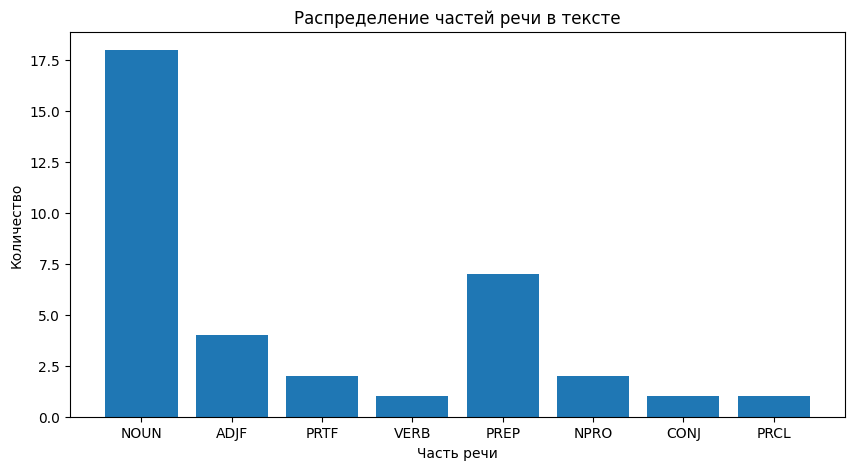

In [13]:
plt.figure(figsize=(10, 5))
plt.bar(pos_counts.keys(), pos_counts.values())
plt.xlabel("Часть речи")
plt.ylabel("Количество")
plt.title("Распределение частей речи в тексте")
plt.show()
